# Importing Necessary Libraries

In [ ]:
import numpy as np
import pandas as pd
import sys
import os
from PIL import Image as pilimg
from matplotlib import pyplot as plt

# Visualization

In [ ]:
def plot_weights(filters, intt):
  '''
    Visualize weights in Convolutional Layer

    Parameters:

      'filters' : numpy array of shape (number_of_filters, channels, rows, cols)
        weights associated with Convolution layer which need to be plotted
  '''
  count =1
  #for each filter
  for f in range(filters.shape[0]):
    
    #for each channel
    for d in range(filters.shape[1]):
      plt.figure(intt)
      plt.subplot(filters.shape[0], filters.shape[1], count)
      plt.imshow(filters[f,d])
      
      if not f>0:
        plt.title('Channel ' + str(d+1))

      if not d > 0:
        plt.ylabel('Filter ' + str(f+1)) 
      
      count += 1


# Setting Up Model

In [ ]:
def prediction(path):
  '''
    Displays a table having image, predicted class and its probability as its columns and rows as each image.

    Parameters:

      'path' : str
        path to folder containing the images on which prediction is required
      

    Notes:

      - The function requires model and some helper functions which are obtained from "Model.npy" and "CNN_Training_Code.py" respectively.
        Thus, these two files must be in the same dir as that of this file "CNN_Prediction_Code.py".
        Furthermore, the names of the files must not be different or the code will break.

      - The function expects images to be of "jpg" format and of type "uint8"
  
  '''
 
  #check whether directory is provided
  if not os.path.isdir(path):
    sys.exit("Invalid Path provided. The path must be to a valid directory")

  #ignore files that do not end with ".jpg" 
  path_to_images = [os.path.join(path, image) for image in os.listdir(path) if image.endswith(".jpg")]
  noOfImages = len(path_to_images)


  #check whether images exists in the directory
  if noOfImages == 0:
    sys.exit("No image found in the directory")
  else:
    print((noOfImages), " Images found")

  #Check whether helper functions file and model exists in the current directory
  helper_functions_file = 'CNN_Training_Code.py'
  model = 'Model.npy'
  
  curr_dir = os.getcwd() #current working directory

  if model not in os.listdir(curr_dir):
    sys.exit('"Model Not found: Make sure "Model.npy" is in the same directory of this file and is named properly. ')
  else:
    print("Model found")
    model = os.path.join (curr_dir, model)

  if helper_functions_file not in os.listdir(curr_dir):
    sys.exit('"Helper funcitons file Not found: Make sure "CNN_Training_Code.py" is in the same directory of this file and is named properly. ')
  else:
    print("Helper functions file found") #remove



  #Import classes from the helper function
  from CNN_Training_Code import Network, Conv, Pool, LeakyReLU, FC, Softmax

  #read data from the file in the same order as it was written to it
  with open(model, 'rb') as file:
    
    #read size of input to the network
    resize = np.load(file)

    #read zero center related data
    mean = np.load(file)


    #read labels
    labels = np.load(file)

    #read layers
    layers = np.load(file, allow_pickle=True)
    
    #load parameters and other assiocated data and build each layer
    layer_objs =[]

    for layer in layers:
      

      #Convolutional Layer
      if layer == 'Conv':
         
        stride = np.load(file)
        zero_padding = np.load(file)
        weights = np.load(file)
        bias = np.load(file)
        
        conv = Conv(number_of_filters=weights.shape[0], filter_size=weights.shape[2], stride=stride, zero_padding=zero_padding)
        conv.weights = weights
        conv.bias = bias

        layer_objs.append(conv)


      #Pooling Layer
      if layer == 'Pool':
        
        pooling_type =np.load(file)
        filter_size = np.load(file)
        stride = np.load(file)
        zero_padding = np.load(file)

        layer_objs.append(Pool(pooling_type=pooling_type, filter_size=filter_size, stride=stride, zero_padding=zero_padding))

      #Fully Connected Layer
      if layer == 'FC':
        
        neurons = np.load(file)
        fc= FC(neurons)
        fc.weights = np.load(file)
        fc.bias = np.load(file)

        layer_objs.append(fc)
      
      #LeakyReLU
      if layer == 'LeakyReLU':
        
        layer_objs.append(LeakyReLU())

      #Softmax
      if layer == 'Softmax':

        layer_objs.append(Softmax())


  class AD:
    pass

  #build network
  net = Network(layer_objs, 0, 0,  AD())   
  net.flag=False
  net.eval_metric = None


  #build batch of images  
  for image in path_to_images:
  
    #Read image
    img = pilimg.open(image)

    #Resize image
    img =img.resize(resize)
      
    img = np.asarray(img)
    
    #map image between 0 and 1
    img  = img / 255

    #zero center the data
    img = img - mean      
    
    #reshape image to (depth, width, height)
    img = np.array([img[:,:,0],img[:,:,1],img[:,:,2]])


    net.forward_propagate(img[np.newaxis,...], None, False ) 

    #indexes of highest values (prediction)
    pred_labels=np.where(np.max(net.layers[-1].activations, axis=1) == net.layers[-1].activations )

    print("the predicted label for image ", image ," is ", labels[pred_labels[1]], "with ", net.layers[-1].activations[pred_labels]*100, " probability ")

    

# Prediction

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

29  Images found
Model found
Helper functions file found
the predicted label for image  /content/drive/MyDrive/Prediction/LY_3530.jpg  is  ['platelet'] with  [22.08415312]  probability 
the predicted label for image  /content/drive/MyDrive/Prediction/LY_6217.jpg  is  ['platelet'] with  [22.20484793]  probability 
the predicted label for image  /content/drive/MyDrive/Prediction/MO_2893.jpg  is  ['platelet'] with  [24.44894367]  probability 
the predicted label for image  /content/drive/MyDrive/Prediction/BNE_715.jpg  is  ['platelet'] with  [22.22192696]  probability 
the predicted label for image  /content/drive/MyDrive/Prediction/EO_708.jpg  is  ['neutrophil'] with  [23.95639452]  probability 
the predicted label for image  /content/drive/MyDrive/Prediction/MO_4232.jpg  is  ['platelet'] with  [21.78444208]  probability 
the predicted label for image  /content/drive/MyDrive/Prediction/BNE_2506.jpg  is  ['platelet'] with  [21.50283805]  probability 
the predicted label for image  /conten

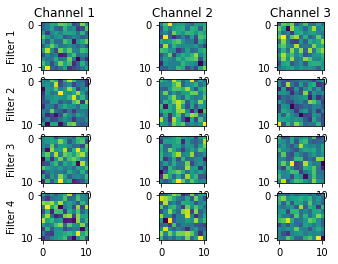

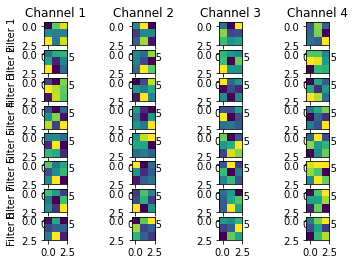

In [ ]:
path_to_images_folder = '/content/drive/MyDrive/Prediction'
prediction(path_to_images_folder)